

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#Ask">Asking a question</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [116]:
#import the used libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='Ask'></a>
# Asking a question
My question:Which gender has the highest number of no-shows?

This step is important to help me in finding a reslt.

<a id='wrangling'></a>
## Data Wrangling
Gather, access and clean.

The data already gathered, then I will access the dataset to identify problems. Finally, cleaning the dataset according to what I found.

### General Properties

In [117]:
# Load the dataset.
def read(data):
    appointment_df=pd.read_csv(data)
    return appointment_df

    
appointment_df=read('Medical Appointment No Shows.csv')


In [118]:
#View some lines to see if the data frame need any edit in the columns name or problems in the table.
appointment_df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [119]:
#show the size of the dataset by view the number of rows and columns.
appointment_df.shape

(110527, 14)

### Wrong data type, null values, and duplicate values affect the quality of the dataset that will lead to an effect on the accuracy of the result. In the next steps, I used functions in order to increase the quality.

In [120]:
#show the data types and check if there is a null values or not.
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [121]:
#check for duplicate values
sum(appointment_df.duplicated())

0

In [122]:
#show statistical details such as minimum and maximum, this function helped in finding outliers data.Outliers 
#skew the result so remove them is the best solution.As shown in the age, the value -1 
#and 115 considered as outliers. 
appointment_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning 
As shown the dataset doesn't contain any null values or duplicate.
In this phase, some data types will be changed. Also, rename the columns and removing outliers.

In [123]:
#Rename the columns. splitting the words in the column's name using '_'. Also, replace uppercase letters into 
#lowercase letters in order to avoid confusion.
appointment_df.rename(columns={'PatientId': 'patient_id', 'AppointmentID': 'appointment_id',
'Gender': 'gender', 'ScheduledDay': 'scheduled_day','AppointmentDay': 'appointment_day','Age': 'age', 
'Neighbourhood': 'neighbourhood', 'Scholarship': 'scholarship', 'Hipertension': 'hypertension',
'Handcap': 'handicap', 'Diabetes': 'diabetes', 'Alcoholism': 'alcoholism', 'SMS_received': 'sms_received', 
'No-show': 'no_show'}, inplace=True)
appointment_df.head(1) 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [124]:
#Change the data type 
#patient_id type is float, which not acceptable as id number. The solution is to convert the float to 
#int to be more suitable.
appointment_df['patient_id']= appointment_df['patient_id'].astype(int)

In [125]:
#change the wrong data type of the scheduled day and appointment day to DateTime type. 
appointment_df['scheduled_day'] = pd.to_datetime(appointment_df['scheduled_day'])
appointment_df['appointment_day'] = pd.to_datetime(appointment_df['appointment_day'])

In [126]:
#As mentioned previously. In the age, the outliers values will be removed such as -1 and 115 to increase the quality.
appointment_df = appointment_df[(appointment_df['age'] >= 0) & (appointment_df['age'] <= 100)]
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110519 non-null int64
appointment_id     110519 non-null int64
gender             110519 non-null object
scheduled_day      110519 non-null datetime64[ns, UTC]
appointment_day    110519 non-null datetime64[ns, UTC]
age                110519 non-null int64
neighbourhood      110519 non-null object
scholarship        110519 non-null int64
hypertension       110519 non-null int64
diabetes           110519 non-null int64
alcoholism         110519 non-null int64
handicap           110519 non-null int64
sms_received       110519 non-null int64
no_show            110519 non-null object
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis
Through using visualization techniques, I will visualize some chart to help me in achieving a result
### Question 1: Which gender has the highest number of no-shows?

Text(0.5, 0, 'no_show')

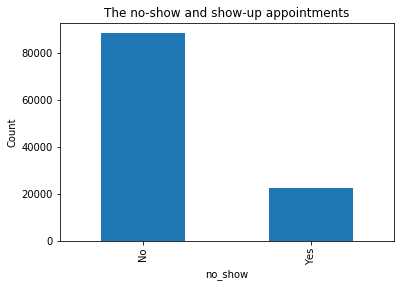

In [128]:
#First, will take a look at the missed appointment. show how many appointments have been missed and the opposite
#will help in discovering the size of the case. 
#Bar chart used to view the number of no-show and show-up appointments.
appointment_df['no_show'].value_counts().plot(kind='bar')
plt.title('The no-show and show-up appointments')
plt.ylabel('Count')
plt.xlabel('no_show')

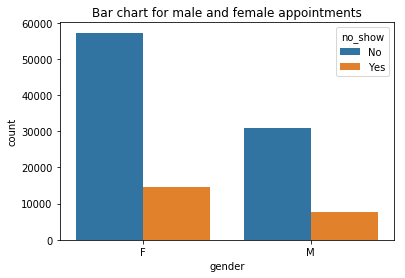

In [131]:
#the relation between the gender and appointment, bar chart helped in summarizing the number of 
#no-show and show-up appointment for each the males and females.  
x = sns.countplot(x=appointment_df.gender, hue=appointment_df.no_show, data=appointment_df)
x.set_title("Bar chart for male and female appointments")
plt.show();

Text(0.5, 1.0, 'The number of female patients and male patients')

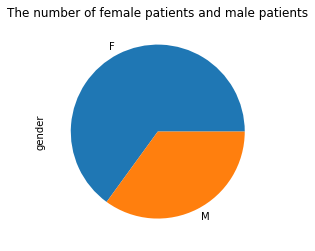

In [132]:
#the number of female patients and male patients, comparison the number of female patient versus male patient, this 
#will help in the proofing.
appointment_df.gender.value_counts().plot(kind='pie')
plt.title('The number of female patients and male patients')

In [133]:
#view the number of male patients and female patients. to help in drawing the conclusion.
w=len(appointment_df[(appointment_df['gender']=='F')])
m=len(appointment_df[(appointment_df['gender']=='M')])
print('The number of female patients {}'.format(w))
print('The number of male patients {}'.format(m))

The number of female patients 71832
The number of male patients 38687


<a id='conclusions'></a>
## Conclusions

After I complete all the phases, starting from asking a  question, wrangling, cleaning, finally with exploring. no-show the appointment, a few numbers of the no-show comparing to the show-up, where must of the patient show-up their appointment. I tried to find a relation between the gender and no-show the appointment through the question that I applied in the project,  I found that female patients are the most no-show appointment comparing to the male patients. but, when I compared the number of female patients and male patients. 71832 appointments made by females,  where 38687 appointments made by males. It makes a sense the difference of the no-show appointment between the male and female. So, no relation between the gender and the no-show the appointment. If the dataset was bigger, I might achieve a more accurate result. One of the most obstacle challenges were the dataset wasn't enough to help me in achieving an accurate result. Also, choose the best chart for each visualization part.



In [134]:
appointment_df.to_csv('Medical Appointment No Shows_Edited.csv', index=False)

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])